In [2]:
import matplotlib as mpl
import numpy as np
import cv2 as cv
import scipy.cluster.vq as scv
from IPython.display import Image


In [3]:
cmap = mpl.colormaps["hot"]

def colormap2arr(arr,cmap):
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0.0,1.0,100))[:,:-1][::-1]

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(arr.shape[0],arr.shape[1])
    values=values[::-1]
    return values


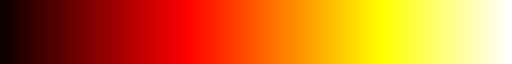

In [4]:
cmap


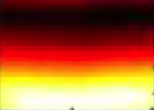

In [5]:
Image(filename='2.png')


In [6]:
ims = list(map(lambda i: cv.imread(f"{i}.png")[...,::-1] / 255, np.arange(1,12 + 1)))
vals = np.array(list(map(lambda im: colormap2arr(im, cmap), ims)))


In [7]:
repr(vals)


'array([[[0.54, 0.54, 0.54, ..., 0.54, 0.54, 0.54],\n        [0.53, 0.53, 0.53, ..., 0.54, 0.54, 0.53],\n        [0.53, 0.53, 0.53, ..., 0.54, 0.54, 0.53],\n        ...,\n        [0.53, 0.53, 0.53, ..., 0.53, 0.53, 0.54],\n        [0.53, 0.53, 0.53, ..., 0.53, 0.53, 0.54],\n        [0.54, 0.54, 0.54, ..., 0.54, 0.54, 0.54]],\n\n       [[0.11, 0.1 , 0.09, ..., 0.86, 0.9 , 0.89],\n        [0.12, 0.11, 0.11, ..., 0.4 , 0.43, 0.82],\n        [0.14, 0.13, 0.13, ..., 0.13, 0.14, 0.14],\n        ...,\n        [0.93, 0.92, 0.91, ..., 0.92, 0.92, 0.92],\n        [0.93, 0.92, 0.91, ..., 0.91, 0.91, 0.92],\n        [0.93, 0.91, 0.9 , ..., 0.91, 0.91, 0.91]],\n\n       [[0.82, 0.81, 0.81, ..., 0.92, 0.9 , 0.87],\n        [0.76, 0.75, 0.75, ..., 0.85, 0.84, 0.82],\n        [0.54, 0.55, 0.7 , ..., 0.78, 0.78, 0.78],\n        ...,\n        [0.87, 0.88, 0.88, ..., 0.9 , 0.9 , 0.91],\n        [0.88, 0.88, 0.89, ..., 0.91, 0.92, 0.92],\n        [0.88, 0.88, 0.89, ..., 0.92, 0.92, 0.93]],\n\n       ...,\

In [8]:
for i in range(vals.shape[0]):
	np.savetxt(f"vals{i+1}.txt", vals[i].flatten(), fmt="%.4f", newline=', ')


In [9]:
timbres = np.array([48.344, -1.819, 32.416, -12.468, 100.94, -35.143, -4.883, 24.404, 16.213, 9.187, -11.85, 15.407])
pitches = np.array([0.342, 0.858, 0.656, 0.147, 1, 0.147, 0.312, 0.186, 0.416, 0.798, 0.179, 0.359])


In [10]:
vals.shape


(12, 110, 154)

In [58]:
amplitudes = np.einsum('i,ijk->jk',timbres,vals)
amplitudes


array([[ 48.67451,  47.11449,  47.28388, ..., 148.08087, 141.75523,
         54.10605],
       [ 39.29804,  39.64775,  39.69101, ..., 124.8289 ,  53.91   ,
         43.4146 ],
       [ 37.79089,  38.75093,  43.78127, ...,  48.70241,  45.84601,
         43.91315],
       ...,
       [131.6452 , 131.71561, 132.28129, ..., 148.62478, 150.22739,
        152.84086],
       [132.73306, 134.9361 , 136.8592 , ..., 149.39028, 151.70405,
        155.97637],
       [134.50713, 135.57043, 137.88413, ..., 153.80297, 154.65017,
        157.1527 ]])

In [37]:
timbres *


SyntaxError: invalid syntax (1407392616.py, line 1)